# SQL for Data Analytics

Data analysis blends the power of computing with techniques from traditional statistics. Data analysis is part data discovery, part data interpretation, and part data communication. Very often the purpose of data analysis is to improve decision making, by humans and increasingly by machines through automation.


## What is SQL?

`SQL` is the language used to communicate with databases. The acronym stands for `Structured Query Language` and is pronounced either like “sequel” or by saying each letter, as in “ess cue el.” This is only the first of many controversies and inconsistencies surrounding SQL that we’ll see, but most people will know what you mean regardless of how you say it. 

There is some debate as to whether SQL is or isn’t a programming
language. It isn’t a general purpose language in the way that C or Python
are. SQL without a database and data in tables is just a text file. SQL can’t build a website, but it is powerful for working with data in databases. 

<img src="assets/sql.png" width = 500 px></img>


On a practical level, what matters most is that SQL can help you get the job of data analysis done.  It allows use to interact and capture the relationships between different sources of data. 


SQL is designed for managing data held in a relational database management system (RDBMS), or for stream processing in a relational data stream management system (RDSMS). It is particularly useful in handling structured data, i.e. data incorporating relations among entities and variables.

## SQL vs. Pandas
If you have experience with `pandas` you will notice that there is a big overlap between what you can do with SQL and pandas Read more: 
- [Pandas vs. SQL Cheat Sheet](https://datascientyst.com/pandas-vs-sql-cheat-sheet/)
- [SQL vs Python: Which Should You Learn?](https://www.datacamp.com/blog/sql-vs-python-which-to-learn) 
- [Comparison with SQL (pandas documentation)](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)

In the broader picture,which one you use depends on your goal, for the most part: 
* SQL is more efficient in querying data but it has less functions whereas in pandas, there might be lag for large volumes of data but it has more functions which enable us to manipulate data in an effective way. 
* SQL works on a relational model which makes linking tables via keys much easier and regulates the entry of data in other tables in case of a foreign key constraint but Pandas makes data manipulation much easier.
* Pandas is better if you intend to manipulate the data or plot it as it does it all in one place whereas in SQL we have to use Tableau for data visualization

However, by knowing both (and when to use them), you can combine the power of both to your advantage.

## Why use SQL?

Perhaps the best reason to use SQL is that much of the world’s data is already in databases. It’s likely your own organization has one or more databases. Even if data is not already in a database, loading it into one can be worthwhile in order to take advantage of the storage and computing advantages, especially when compared to alternatives  such as spreadsheets. 

SQL is the de facto standard for interacting with databases and retrieving data from them. A wide range of popular software connects to databases with SQL, from spreadsheets to BI and visualization tools and coding languages such as Python and R.

When deciding whether to use SQL, R, or Python for an analysis, consider:

* Where is the data located—in a database, a file, a website?
* What is the volume of data?
* Where is the data going—into a report, a visualization, a statistical analysis?
* Will it need to be updated or refreshed with new data? How often?
* What does your team or organization use, and how important is it to conform to existing standards?

<img src="./assets/sql_in_data_analysis.png" width = 500px></img>

Source: [SQL for Data Analysis by Cathy Tanimura](https://www.amazon.in/SQL-Data-Analysis-Cathy-Tanimura-ebook/dp/B09FX81BDM)

SQL shines in the storage and ETL parts of a data pipeline. SQL is applied to explore, profile, clean, shape, and analyze the data.

In the next few sections, we will dive into how to integrate SQL in our data pipeline. We can use SQL to perform many types of data analyses: timeseries, cohorts, text, anomaly detection, etc. 

What is different now vs. when using Python? Our goal using SQL is mostly to prepare the data for the next step of the process (i.e. exploratory data analysis, modeling, ect.). In this section, we'll walk through one example on how we can leverage SQL for data analysis

# The Data

The SQL examples we will see are based on the book *SQL for Data Analysis by Cathy Tanimura* who has made the datasets from the book avalaible in this Github Repository: https://github.com/cathytanimura/sql_book.

## The Mission: Retail Spending Patterns

Let's say you work for the US Goverment and are interested in knowing consumer spending patterns. You receive a spreadsheet that contains monthly retail sales data (1992 - 2020). The goverment want so create a web report to deploy on their website and store the data in a database assessible to developers around the globe. 
 
It includes both total sales as well as details for subcategories of retail sales. It contains both unadjusted and seasonally adjusted numbers. Sales figures are in millions of US dollars. 

In [1]:
print("Hello, World!")

Hello, World!


In [2]:
# Import required libraries
import sqlite3
import pandas as pd
  
# Connect to SQLite database
conn = sqlite3.connect(r'./data/us_sales.db')
  
# Load CSV data into Pandas DataFrame
sales_data = pd.read_csv('./data/us_retail_sales.csv')
# Write the data to a sqlite table
sales_data.to_sql('retail_sales', conn, if_exists='replace', index=False)
  
# Create a cursor object
cur = conn.cursor()

Let's take a look at the first few rows of our database.

In [3]:
cur.execute("""
            SELECT * 
            FROM retail_sales
            LIMIT 5;
            """)
cur.fetchall()

[('1992-01-01', '441', 'Motor vehicle and parts dealers', None, 29811.0),
 ('1992-01-01', '4411', 'Automobile dealers', None, 25800.0),
 ('1992-01-01',
  '4411, 4412',
  'Automobile and other motor vehicle dealers',
  None,
  26788.0),
 ('1992-01-01', '44111', 'New car dealers', None, 24056.0),
 ('1992-01-01', '44112', 'Used car dealers', None, 1744.0)]

With time series data, we often want to look for trends in the data. A trend is simply the direction in which the data is moving. 

We will query our newly created database and use pandas to plot our results. You can do this in [a few ways](https://datatofish.com/sql-to-pandas-dataframe/), but we will use the `read_sql_query() pandas method`. 

In [4]:
import pandas as pd

query = """SELECT sales_month ,sales
           FROM retail_sales
           WHERE kind_of_business = 'Retail and food services sales, total';
"""
sales_df  = pd.read_sql_query (query, conn)
sales_df.head()

,sales_month,sales
0,1992-01-01,146376.0
1,1992-02-01,147079.0
2,1992-03-01,159336.0
3,1992-04-01,163669.0
4,1992-05-01,170068.0


Then we can use our favorite visualization library see our results. I will use plotly which has some nice features for dealing with time series and data axes. Read more: [Time Series and Date Axes in Python](https://plotly.com/python/time-series/#configuring-tick-labels).


In [6]:
import sys
print(sys.executable)


c:\Users\Shen\anaconda3\envs\myenv\python.exe


In [13]:
import plotly.express as px
fig = px.line(sales_df, x='sales_month', y="sales",
               labels={
                     "sales": "Sales (in millions, USD)",
                     "sales_month": "Month"}, 
              title = "Monthly Retail and Food Services Sales (1992 - 2020)")
import plotly.io as pio
pio.renderers.default = 'browser'

fig.show()


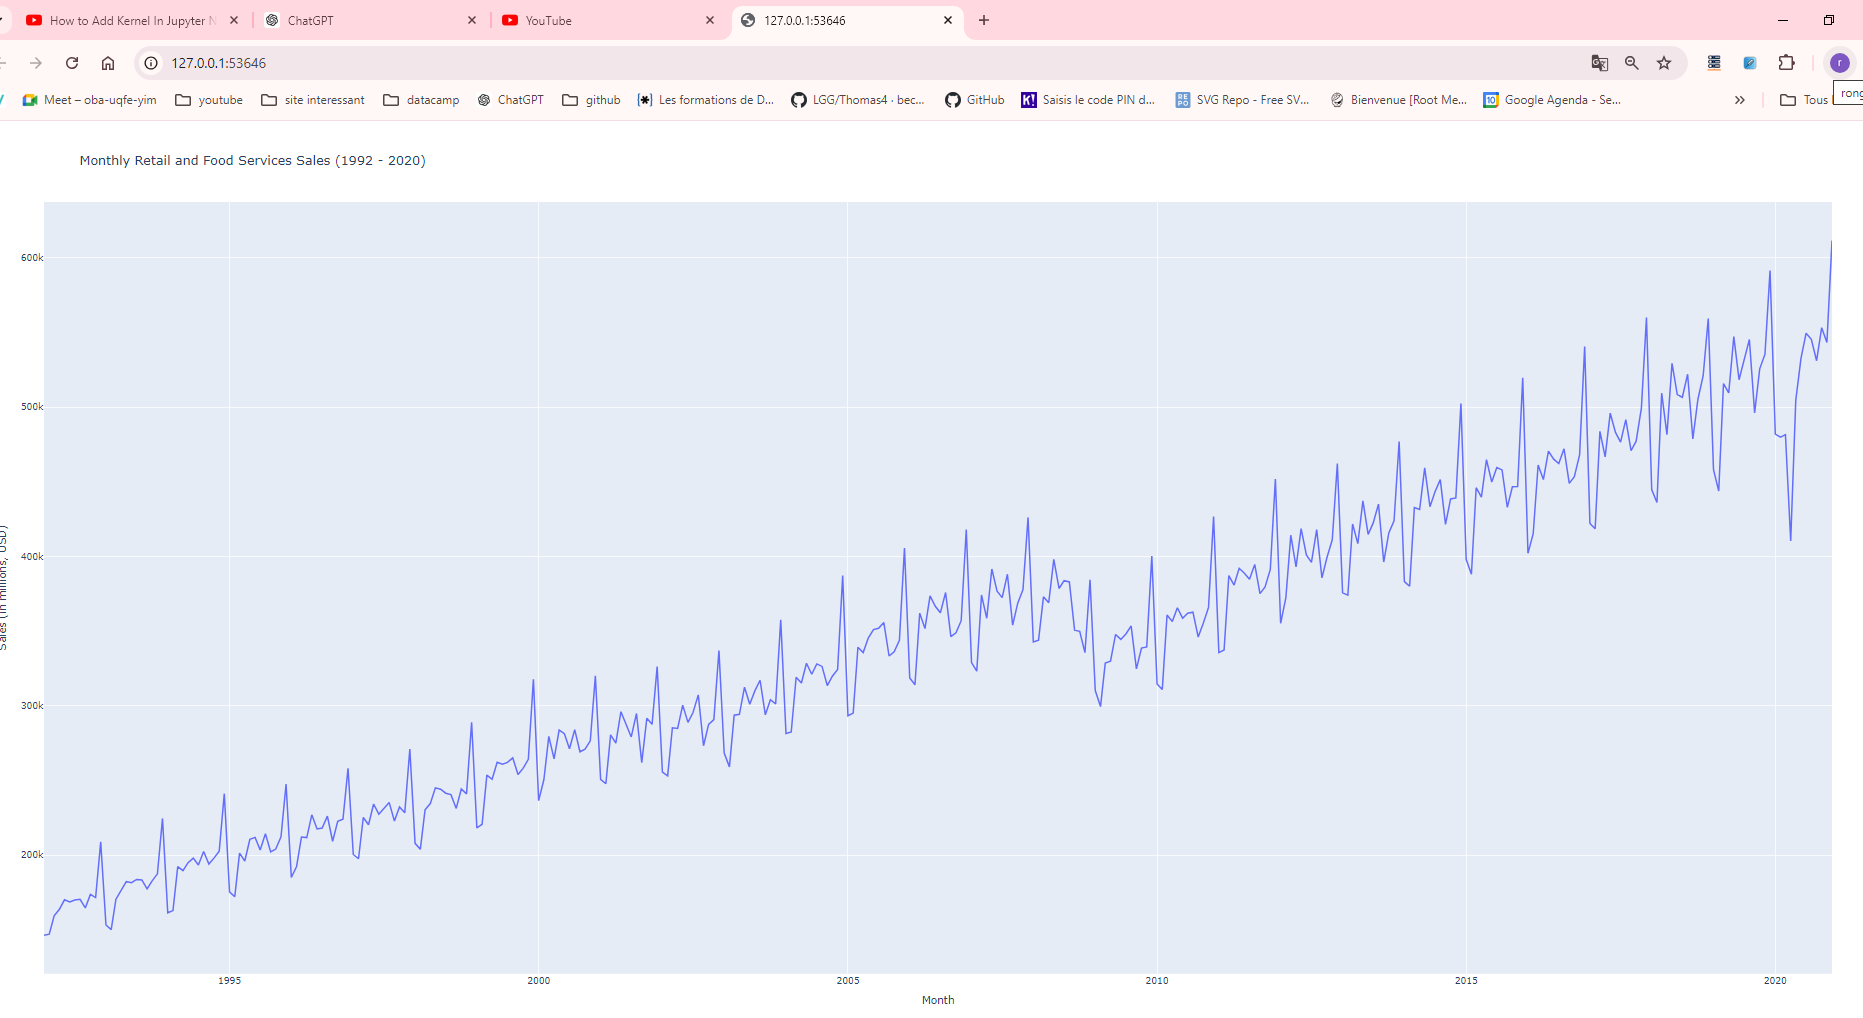
http://127.0.0.1:53646/

In [6]:
# Install plotly if not already installed
#!pip install plotly

^C


  Using cached plotly-5.23.0-py3-none-any.whl.metadata (7.3 kB)
Using cached plotly-5.23.0-py3-none-any.whl (17.3 MB)


This data clearly has some patterns, but it also has some noise. Transforming the data and aggregating at the yearly level can help us gain a better understanding. 

- First, we’ll use the `strftime` function to return just the year from the sales_month field and then sum the sales. Read more: [SQL strftime function](https://www.sqlitetutorial.net/sqlite-date-functions/sqlite-strftime-function/)
- The results are filtered to the “Retail and food services sales, total” kind_of_business in the `WHERE` clause:

In [14]:
query = """SELECT strftime('%Y', sales_month) AS sales_year   
,sum(sales) AS sales
FROM retail_sales
WHERE kind_of_business = 'Retail and food services sales, total'
GROUP BY 1 ;"""

yearly_sales_df = pd.read_sql_query (query, conn)
yearly_sales_df.head()

,sales_year,sales
0,1992,2014102.0
1,1993,2153095.0
2,1994,2330235.0
3,1995,2450628.0
4,1996,2603794.0


In [15]:
import plotly.express as px
fig = px.line(yearly_sales_df, x='sales_year', y="sales",
               labels={"sales": "Sales (in millions, USD)", "sales_year": "Year"}, 
              title = "Yearly Retail and Food Services Sales (1992 - 2020)")
fig.show()

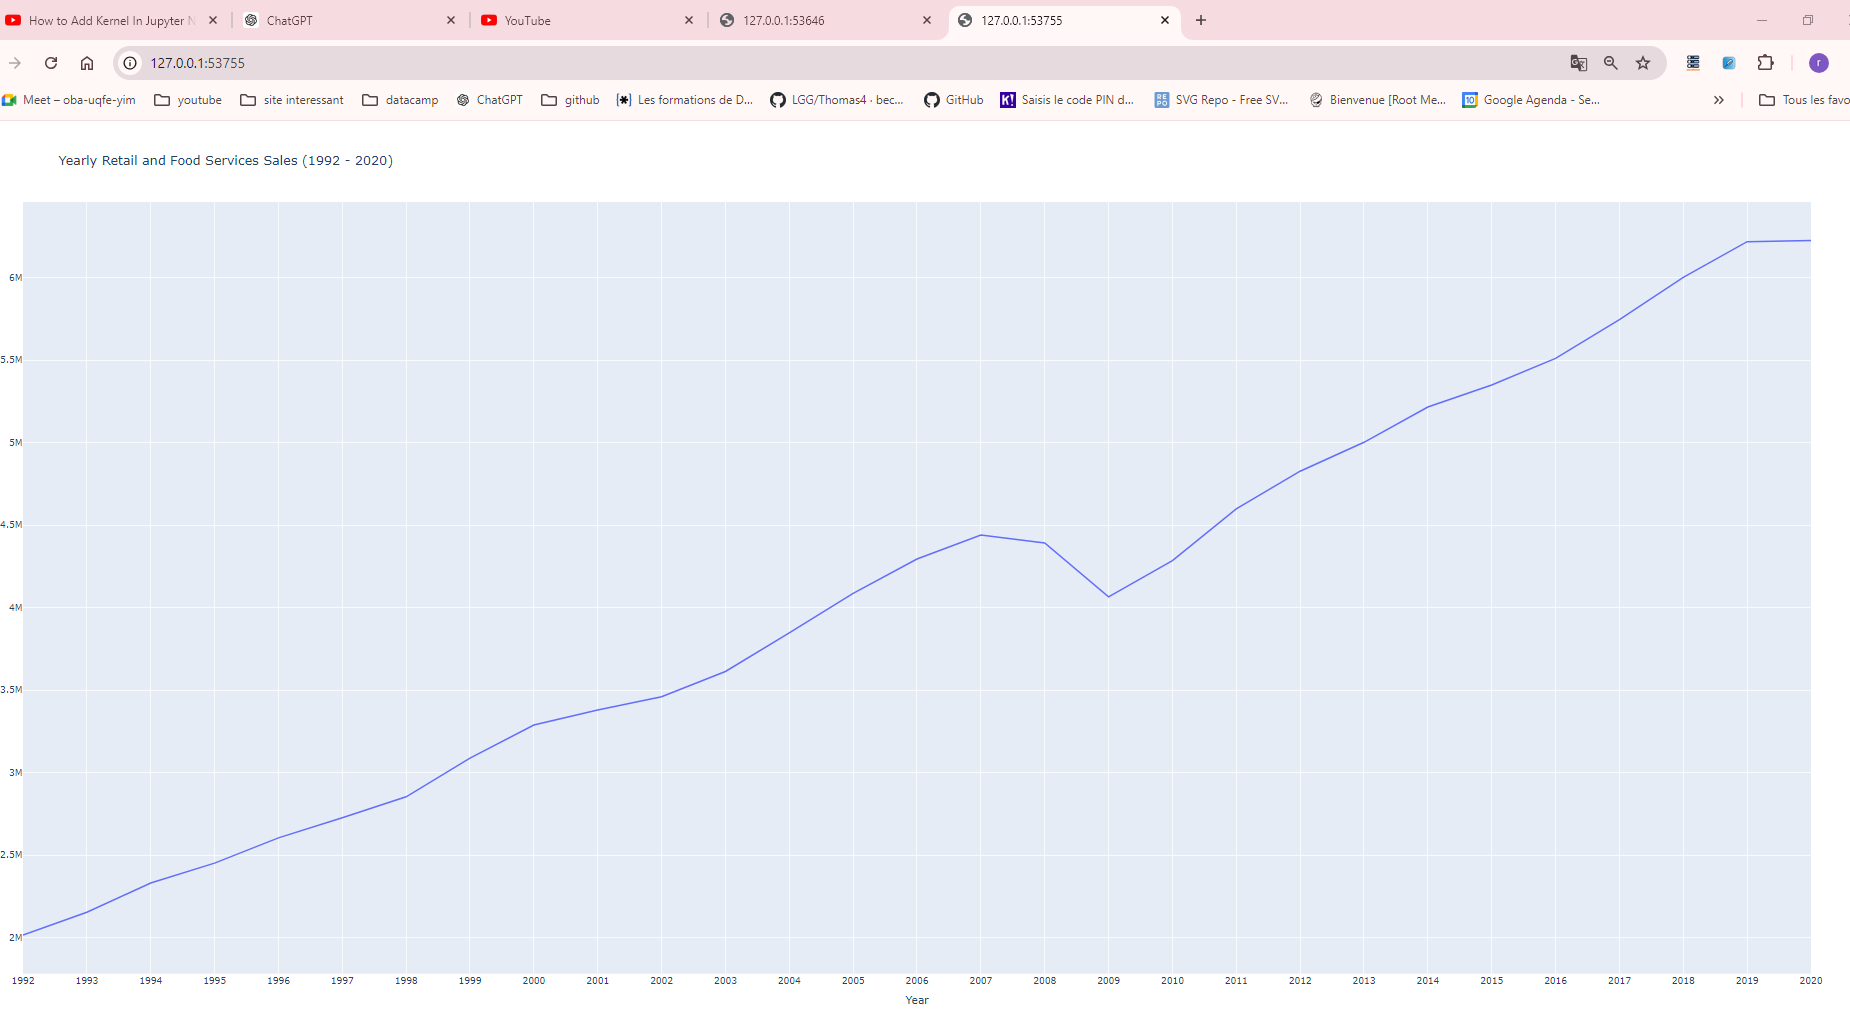
http://127.0.0.1:53755/


**Exercise: What if we want to compare different categories of service?**

Modify the previous query to compare the yearly sales trend for a few categories that are associated with leisure activities: book stores, sporting goods stores, and hobby stores, and plot the results. 

In [19]:
import sqlite3
import pandas as pd
import plotly.express as px

# Define paths for CSV and SQLite database
csv_file_path = 'C:/Users/Shen/Desktop/Becode/LGG-Thomas4-Shen/02-TheHill/DatabasesIntro/01-SQL/newproject/mynewv/data/us_retail_sales.csv'
db_file_path = 'C:/Users/Shen/Desktop/Becode/LGG-Thomas4-Shen/02-TheHill/DatabasesIntro/01-SQL/newproject/mynewv/data/us_sales.db'

# Load the CSV data into a DataFrame
sales_data = pd.read_csv(csv_file_path)

# Connect to a new SQLite database file
conn = sqlite3.connect(db_file_path)

# Write the DataFrame to a new SQLite table
sales_data.to_sql('retail_sales', conn, if_exists='replace', index=False)

# Define the SQL query to compare yearly sales trends for specific categories
query = """
SELECT strftime('%Y', sales_month) AS sales_year,
       kind_of_business,
       SUM(sales) AS total_sales
FROM retail_sales
WHERE kind_of_business IN ('Book stores', 'Sporting goods stores', 'Hobby stores')
GROUP BY sales_year, kind_of_business
ORDER BY sales_year, kind_of_business;
"""

# Execute the query and load the result into a DataFrame
yearly_sales_comparison_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame to verify data
print(yearly_sales_comparison_df.head())

# Plot the results using Plotly Express
fig = px.line(yearly_sales_comparison_df, 
              x='sales_year', 
              y='total_sales', 
              color='kind_of_business',
              labels={
                  "total_sales": "Sales (in millions, USD)",
                  "sales_year": "Year",
                  "kind_of_business": "Category"
              },
              title="Yearly Sales Trends for Book Stores, Sporting Goods Stores, and Hobby Stores (1992 - 2020)")

# Display the plot
fig.show()


  sales_year       kind_of_business  total_sales
0       1992            Book stores       8327.0
1       1992  Sporting goods stores      15583.0
2       1993            Book stores       9108.0
3       1993  Sporting goods stores      16791.0
4       1994            Book stores      10107.0


http://127.0.0.1:53947/
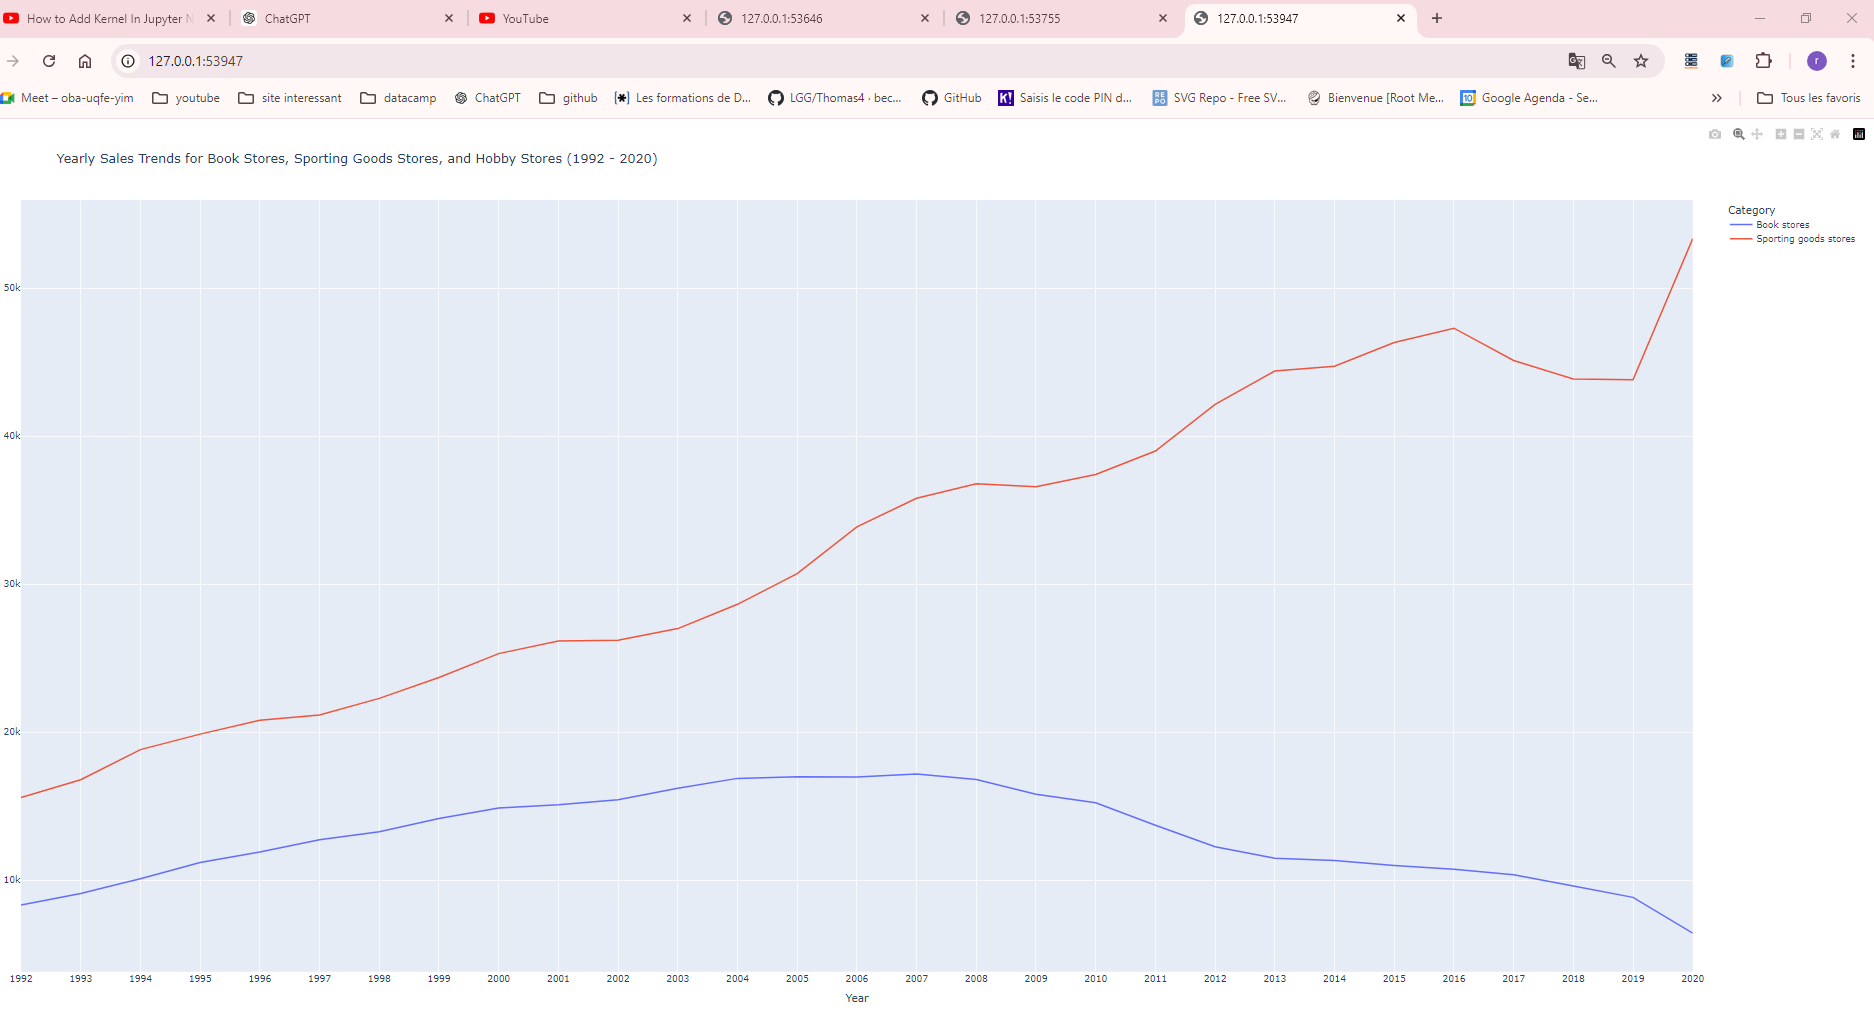

## Analyzing with Seasonality

There are many questions to explore with time series! A common one is to discover patterns in the data. 

**Seasonality** is any pattern that repeats over regular intervals. Unlike other noise in the data, seasonality can be predicted. The word seasonality brings to mind the four seasons of the year—spring, summer, fall, winter—and some data sets include these patterns. 

Shopping patterns change with the seasons, from the clothes and food people buy to the money spent on leisure and travel. The winter holiday shopping season can be make-or-break for many retailers. Let's take a look at out data!

To understand whether seasonality exists in a time series, and at what scale, it’s useful to graph it and then visually inspect for patterns. We can try aggregating at different levels, from hourly to daily, weekly, and monthly. 

You should also incorporate knowledge about the data set. Are there patterns that you can guess based on what you know about the entity or process it represents? 

### Period-over-Period Comparisons: YoY and MoM

Period-over-period comparisons can take multiple forms. The first one is to compare a time period to the previous value in the series, a practice so common in analysis that there are acronyms for the most often-used comparisons. Depending on the level of aggregation the comparison might be year-over-year (YoY), month-over-month (MoM), day-over-day (DoD), and so on.

For these calculations we’ll use the `lag function`, another one of the window functions. The lag function returns a previous or lagging value from a series. 

With an understanding of the values returned by the lag function, we can calculate the percent change from the previous value:

In [20]:
pct_change_query = '''SELECT kind_of_business, sales_month, sales
                    ,(sales / lag(sales) over (partition by kind_of_business 
                                            order by sales_month)
                    - 1) * 100 as pct_growth_from_previous
                    FROM retail_sales
                    WHERE kind_of_business = 'Book stores'
;'''

pct_change_df = pd.read_sql_query (pct_change_query, conn)
pct_change_df.head()
# check the next code , corrigé 

ProgrammingError: Cannot operate on a closed database.

In [21]:
import sqlite3
import pandas as pd

# Define paths for CSV and SQLite database
csv_file_path = 'C:/Users/Shen/Desktop/Becode/LGG-Thomas4-Shen/02-TheHill/DatabasesIntro/01-SQL/newproject/mynewv/data/us_retail_sales.csv'
db_file_path = 'C:/Users/Shen/Desktop/Becode/LGG-Thomas4-Shen/02-TheHill/DatabasesIntro/01-SQL/newproject/mynewv/data/us_sales.db'

# Load the CSV data into a DataFrame
sales_data = pd.read_csv(csv_file_path)

# Connect to the SQLite database file
conn = sqlite3.connect(db_file_path)

# Write the DataFrame to a new SQLite table
sales_data.to_sql('retail_sales', conn, if_exists='replace', index=False)

# Define the SQL query to calculate percentage change
pct_change_query = '''
SELECT kind_of_business, sales_month, sales,
       (sales / lag(sales) over (partition by kind_of_business 
                                 order by sales_month) - 1) * 100 AS pct_growth_from_previous
FROM retail_sales
WHERE kind_of_business = 'Book stores';
'''

# Execute the query and load the result into a DataFrame
pct_change_df = pd.read_sql_query(pct_change_query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
print(pct_change_df.head())


  kind_of_business sales_month  sales  pct_growth_from_previous
0      Book stores  1992-01-01  790.0                       NaN
1      Book stores  1992-02-01  539.0                -31.772152
2      Book stores  1992-03-01  535.0                 -0.742115
3      Book stores  1992-04-01  523.0                 -2.242991
4      Book stores  1992-05-01  552.0                  5.544933


Sales dropped 31.8% from January to February, due at least in part to the seasonal decline after the holidays and the return to school for the spring semester. Sales were down only 0.7% from February to March.

In [10]:
import plotly.express as px
fig = px.line(pct_change_df, x='sales_month', y="pct_growth_from_previous",
               labels={
                     "pct_growth_from_previous": "% Growth",
                     "sales_month": "Month"}, 
              title = "Percent growth from previous month for US retail book store sales")
fig.show()

How to interpret this plot? For example, we see by computing the percentage growth on a month by month basis that:
* The months of August and December have a higher growth percentage across the years. December being the highest up to 2006 and August the highest from 2006 - 2020. This could be due to the summer and winter season.
* The months of February, September, October, experience the biggest drops in growth percentage. 

This can provide insights on how to plan promotions to encourage sales or adjust the inventory to the demand more accurately. 

**Exercise: The calculation for the YoY comparison is similar, but first we need to aggregate sales to the yearly level.**

Hint:
a. First, create a query that aggregate your data at the yearly level.
b. Modify, the previous query to use the yearly aggregates rather than the monthly data. 

In [24]:
import sqlite3
import pandas as pd

# Define paths for CSV and SQLite database
csv_file_path = 'C:/Users/Shen/Desktop/Becode/LGG-Thomas4-Shen/02-TheHill/DatabasesIntro/01-SQL/newproject/mynewv/data/us_retail_sales.csv'
db_file_path = 'C:/Users/Shen/Desktop/Becode/LGG-Thomas4-Shen/02-TheHill/DatabasesIntro/01-SQL/newproject/mynewv/data/us_sales.db'

# Load the CSV data into a DataFrame
sales_data = pd.read_csv(csv_file_path)

# Connect to the SQLite database file
conn = sqlite3.connect(db_file_path)

# Write the DataFrame to a new SQLite table
sales_data.to_sql('retail_sales', conn, if_exists='replace', index=False)

# Step 1: Create a view to aggregate sales data to the yearly level
aggregate_query = '''
CREATE VIEW IF NOT EXISTS yearly_sales AS
SELECT 
    kind_of_business, 
    strftime('%Y', sales_month) AS sales_year,
    SUM(sales) AS total_sales
FROM retail_sales
GROUP BY kind_of_business, sales_year;
'''
conn.execute(aggregate_query)

# Step 2: Calculate YoY percentage change based on yearly aggregates
yoy_query = '''
WITH YearlySales AS (
    SELECT 
        kind_of_business, 
        sales_year,
        total_sales,
        LAG(total_sales) OVER (PARTITION BY kind_of_business ORDER BY sales_year) AS previous_year_sales
    FROM yearly_sales
)
SELECT 
    kind_of_business,
    sales_year,
    total_sales,
    ((total_sales - previous_year_sales) / previous_year_sales) * 100 AS pct_growth_from_previous
FROM YearlySales
WHERE previous_year_sales IS NOT NULL;
'''

# Execute the YoY query and load the result into a DataFrame
yoy_df = pd.read_sql_query(yoy_query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
print(yoy_df.head())


                    kind_of_business sales_year  total_sales  \
0  All other gen. merchandise stores       1993      31683.0   
1  All other gen. merchandise stores       1994      28489.0   
2  All other gen. merchandise stores       1995      29477.0   
3  All other gen. merchandise stores       1996      30023.0   
4  All other gen. merchandise stores       1997      29336.0   

   pct_growth_from_previous  
0                  2.993954  
1                -10.081116  
2                  3.468005  
3                  1.852292  
4                 -2.288246  


In [12]:
# Now, that we are done. Let's close the connection to our database.
# conn.close()

## Voila! 

You have now combined SQL and pandas to do some exploratory data analysis. There is still a lot to learn. Below are some useful resources.

* [Learning SQL? 12 Ways to Practice SQL Online](https://learnsql.com/blog/ways-to-practice-sql-online/)
* [SQL with PowerBI Tutorial](https://www.datacamp.com/tutorial/sql-with-powerbi)
* [Beginner’s Guide For Data Analysis Using SQL](https://www.analyticsvidhya.com/blog/2021/07/beginners-guide-for-data-analysis-using-sql/)
* [SQL Interview Questions: A Data Analyst's Guide for Success](https://www.coursera.org/articles/sql-interview-questions)